In [1]:
file_SaYoPillow = './Datasets/SaYoPillow.CSV' 

In [2]:
import numpy as np

import pandas as pd

from datetime import datetime

import math

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()  # set Seaborn defaults

In [4]:
from sklearn.linear_model import LinearRegression  # for linear regression

from sklearn.cluster import KMeans  # for clustering

In [5]:
#first working on data cleaning for YODL data

df_SaYo = pd.read_csv(file_SaYoPillow)

df_SaYo.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [6]:
#checking null values 

df_SaYo.isnull().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [7]:
#reset the columns

df_SaYo.columns = ["Snoring Range", "Respiration Rate", "Body Temperature", "Limb Movement Rate", "Blood Oxygen Levels", "Eye Movement", "Numbers of Hours of Sleep", "Heart Rate", "Stress Level"]

df_SaYo.tail()

,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen Levels,Eye Movement,Numbers of Hours of Sleep,Heart Rate,Stress Level
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


Text(0.5, 0, 'Days')

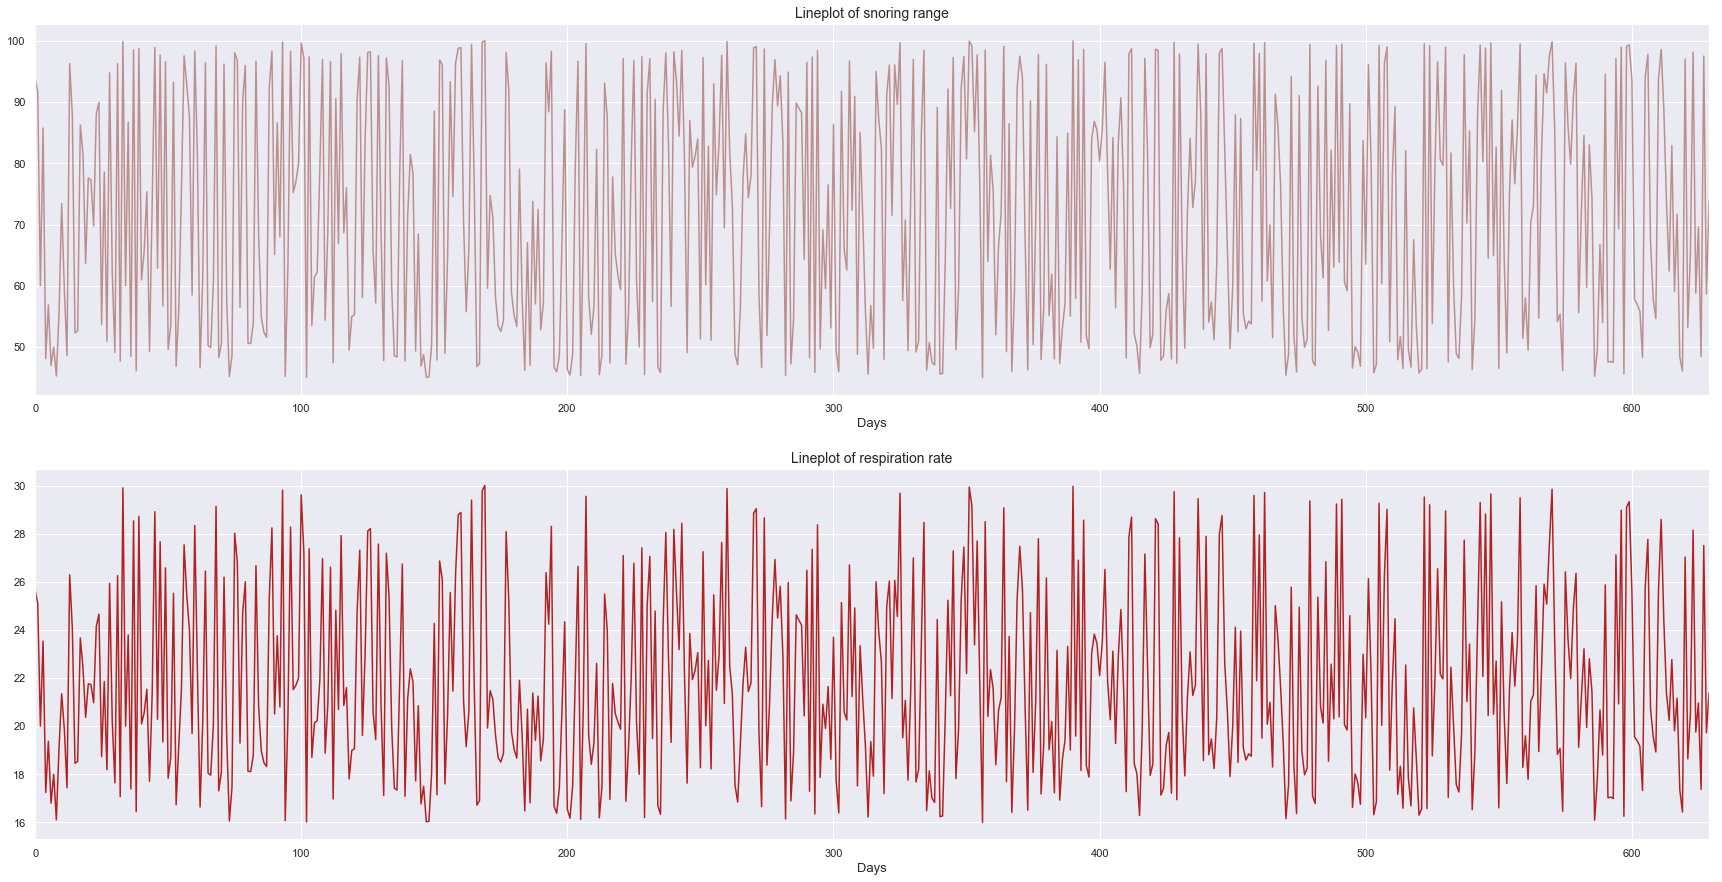

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, squeeze = False, figsize=(30,15))

df_SaYo['Snoring Range'].plot(ax=ax[0, 0], kind = 'line', color="rosybrown")

df_SaYo['Respiration Rate'].plot(ax=ax[1, 0], kind = 'line', color="firebrick")



ax[0,0].set_title ('Lineplot of snoring range', size = 14)

ax[1,0].set_title ('Lineplot of respiration rate',  size = 14)

ax[0,0].set_xlabel('Days', size = 13)

ax[1,0].set_xlabel('Days', size = 13)



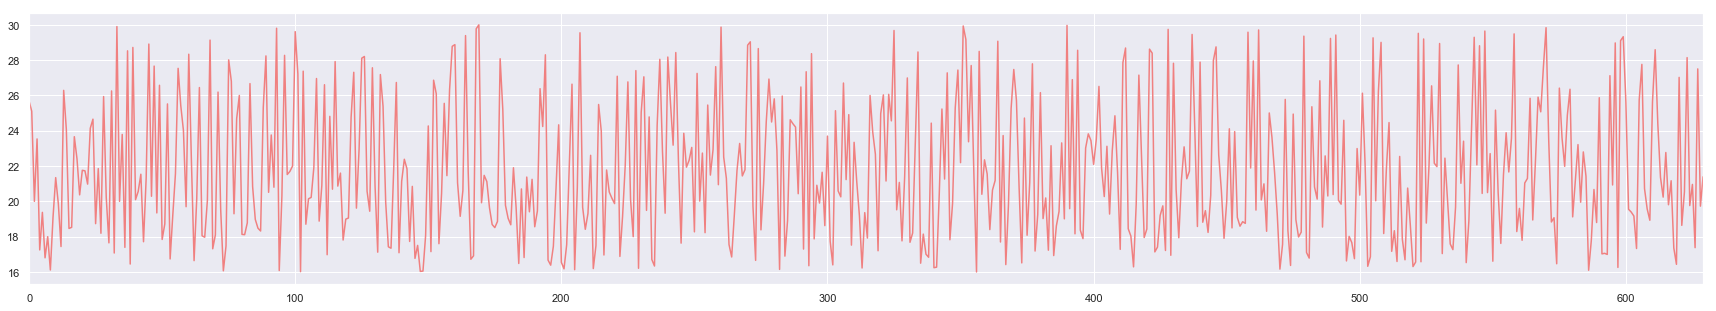

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, squeeze = False, figsize=(30,5))

df_SaYo['Respiration Rate'].plot(ax=ax[0, 0], kind = 'line', color="lightcoral")


In [10]:
df_SaYo_1 = df_SaYo.copy()

df_SaYo_1 ['Sleep hours'] = round (df_SaYo_1 ['Numbers of Hours of Sleep'])

grouped_hours = df_SaYo_1.groupby (['Sleep hours'])

df_SaYo_1_hours = grouped_hours ['Snoring Range', 'Respiration Rate', 'Body Temperature', 'Limb Movement Rate', 'Blood Oxygen Levels', 'Eye Movement', 'Heart Rate', 'Stress Level'].mean().reset_index()

df_SaYo_1_hours.tail()



,Sleep hours,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen Levels,Eye Movement,Heart Rate,Stress Level
5,5.0,62.001509,19.671245,94.08634,9.671245,92.161208,86.000755,59.178113,1.396226
6,6.0,55.000000,19.000000,95.00000,9.000000,93.500000,82.500000,57.500000,1.000000
7,7.0,52.190000,18.000000,96.06200,7.124000,94.938000,73.430000,55.000000,0.500000
8,8.0,47.500000,17.000000,97.50000,6.000000,96.000000,70.000000,52.500000,0.000000
9,9.0,49.380000,17.752000,98.62800,7.504000,96.752000,77.520000,54.380000,0.000000


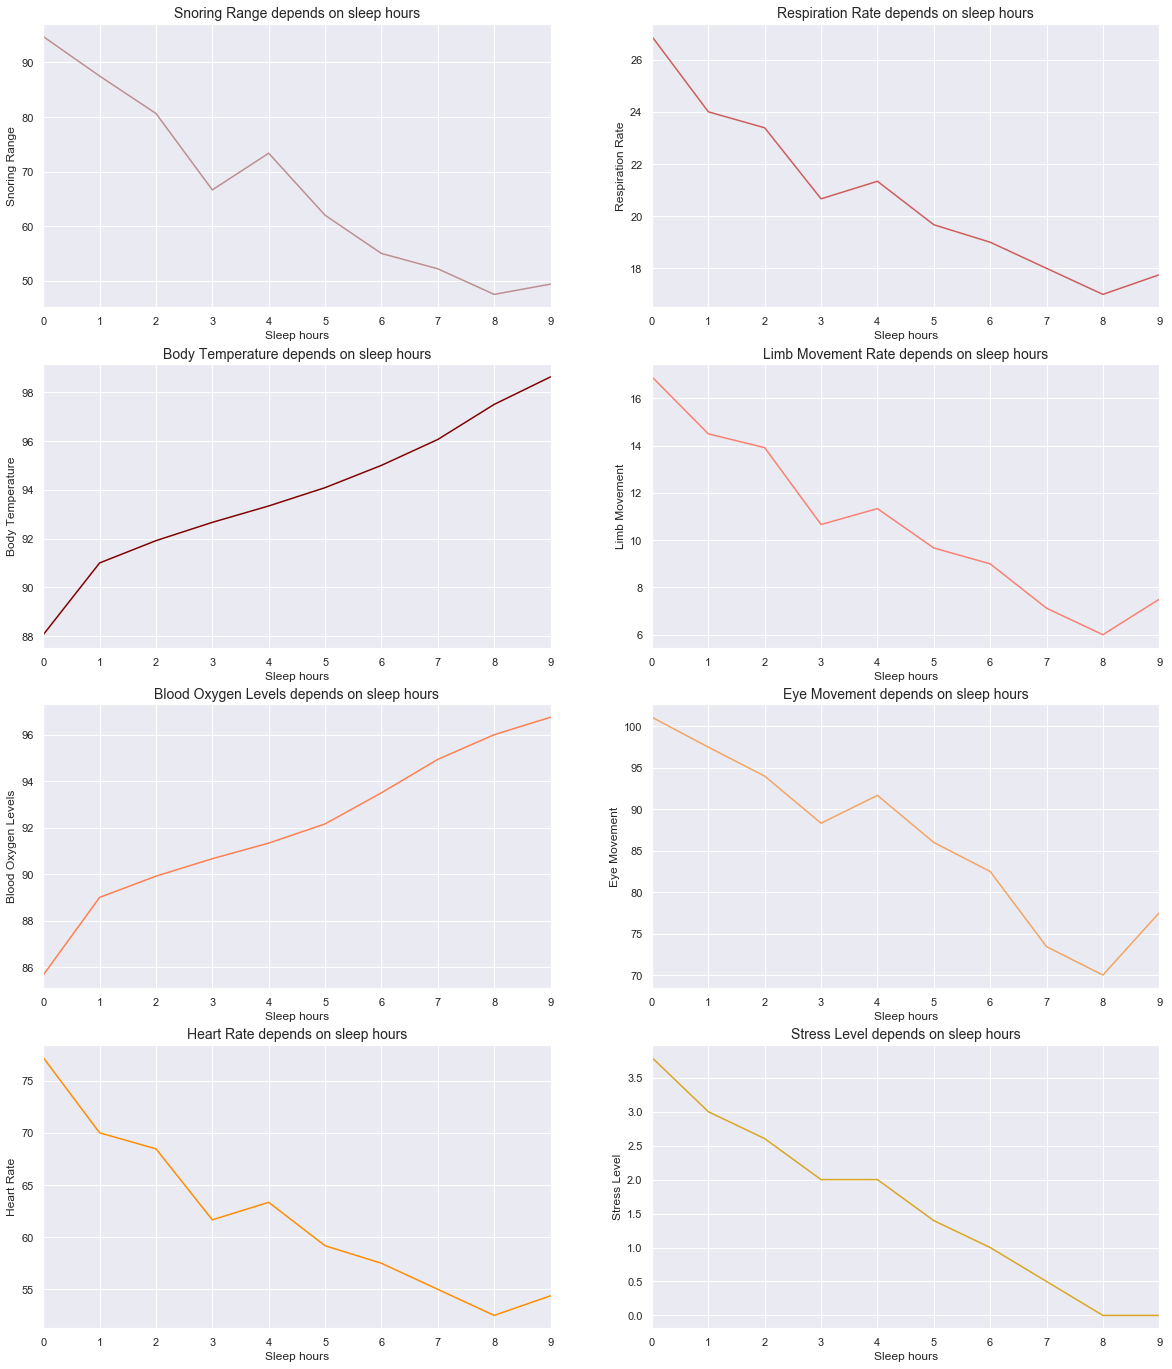

In [11]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, squeeze = False, figsize=(20,24))

df_SaYo_1_hours ['Snoring Range'].plot(ax = ax[0,0], kind = 'line', color = "rosybrown")

df_SaYo_1_hours ['Respiration Rate'].plot (ax = ax [0,1], kind = 'line', color = "indianred") 

df_SaYo_1_hours ['Body Temperature'].plot (ax = ax [1,0], kind = 'line', color = "maroon")

df_SaYo_1_hours ['Limb Movement Rate'].plot (ax = ax [1,1], kind = 'line', color = "salmon")

df_SaYo_1_hours ['Blood Oxygen Levels'].plot (ax = ax [2,0], kind = 'line', color = "coral")

df_SaYo_1_hours ['Eye Movement'].plot (ax = ax [2,1], kind = 'line', color = "sandybrown")

df_SaYo_1_hours ['Heart Rate'].plot (ax = ax [3,0], kind = 'line', color = "darkorange")

df_SaYo_1_hours ['Stress Level'].plot (ax = ax [3,1], kind = 'line', color = "goldenrod")


ax [0,0].set_title ('Snoring Range depends on sleep hours', size = 14)

ax [0,1].set_title ('Respiration Rate depends on sleep hours', size = 14)

ax [1,0].set_title ('Body Temperature depends on sleep hours', size = 14)

ax [1,1].set_title ('Limb Movement Rate depends on sleep hours', size = 14)

ax [2,0].set_title ('Blood Oxygen Levels depends on sleep hours', size = 14)

ax [2,1].set_title ('Eye Movement depends on sleep hours', size = 14)

ax [3,0].set_title ('Heart Rate depends on sleep hours', size = 14)

ax [3,1].set_title ('Stress Level depends on sleep hours', size = 14)


ax [0,0].set_xlabel('Sleep hours', size = 12)

ax [0,1].set_xlabel('Sleep hours', size = 12)

ax [1,0].set_xlabel('Sleep hours', size = 12)

ax [1,1].set_xlabel('Sleep hours', size = 12)

ax [2,0].set_xlabel('Sleep hours', size = 12)

ax [2,1].set_xlabel('Sleep hours', size = 12)

ax [3,0].set_xlabel('Sleep hours', size = 12)

ax [3,1].set_xlabel('Sleep hours', size = 12)


ax [0,0].set_ylabel('Snoring Range', size = 12)

ax [0,1].set_ylabel('Respiration Rate', size = 12)

ax [1,0].set_ylabel ('Body Temperature', size = 12)

ax [1,1].set_ylabel ('Limb Movement', size = 12)

ax [2,0].set_ylabel ('Blood Oxygen Levels', size = 12)

ax [2,1].set_ylabel ('Eye Movement', size = 12)

ax [3,0].set_ylabel ('Heart Rate', size = 12)

ax [3,1].set_ylabel ('Stress Level', size = 12)


ax [0,0].set_xlim (0,9)




plt.show()

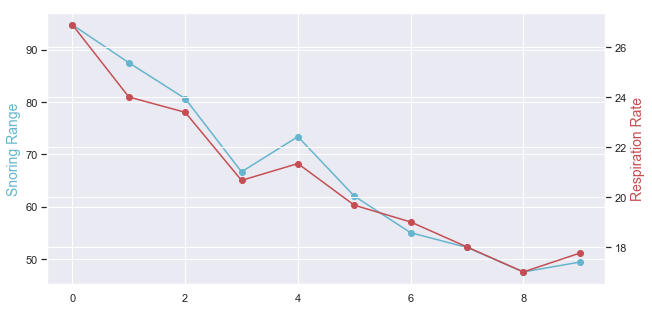

In [12]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot (df_SaYo_1_hours ['Snoring Range'], color="c", marker="o")

ax.set_ylabel("Snoring Range",color="c",fontsize=14)

ax2 = ax.twinx()

ax2.plot(df_SaYo_1_hours ['Respiration Rate'],color="r",marker="o")

ax2.set_ylabel("Respiration Rate",color="r",fontsize=14)



plt.show()

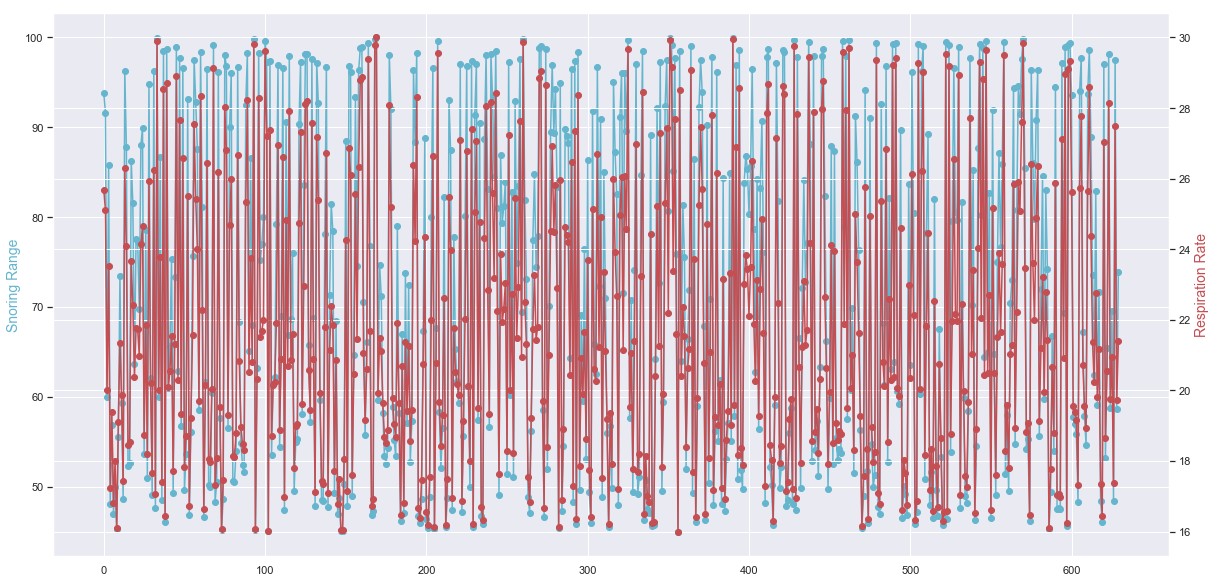

In [13]:

fig,ax = plt.subplots(figsize=(20,10))

ax.plot (df_SaYo_1 ['Snoring Range'], color="c", marker="o")

ax.set_ylabel("Snoring Range",color="c",fontsize=14)

ax2 = ax.twinx()

ax2.plot(df_SaYo_1 ['Respiration Rate'],color="r",marker="o")

ax2.set_ylabel("Respiration Rate",color="r",fontsize=14)



plt.show()

In [14]:
df_SaYo_2 = df_SaYo.copy() #copying the original dataset 

In [15]:
df_SaYo_2['Snoring Range'] = df_SaYo_2['Snoring Range'].astype(float)

sr_group_90 = df_SaYo_2[(df_SaYo_2['Snoring Range'] >= 90.0) & (df_SaYo_2['Snoring Range'] <= 100.0)]

sr_group_80 = df_SaYo_2[(df_SaYo_2['Snoring Range'] >= 80.0) & (df_SaYo_2['Snoring Range'] < 90.0)]

sr_group_70 = df_SaYo_2[(df_SaYo_2['Snoring Range'] >= 70.0) & (df_SaYo_2['Snoring Range'] < 80.0)]

sr_group_60 = df_SaYo_2[(df_SaYo_2['Snoring Range'] >= 60.0) & (df_SaYo_2['Snoring Range'] < 70.0)]

sr_group_50 = df_SaYo_2[(df_SaYo_2['Snoring Range'] >= 50.0) & (df_SaYo_2['Snoring Range'] < 60.0)]

sr_group_40 = df_SaYo_2[(df_SaYo_2['Snoring Range'] >= 40.0) & (df_SaYo_2['Snoring Range'] < 50.0)]

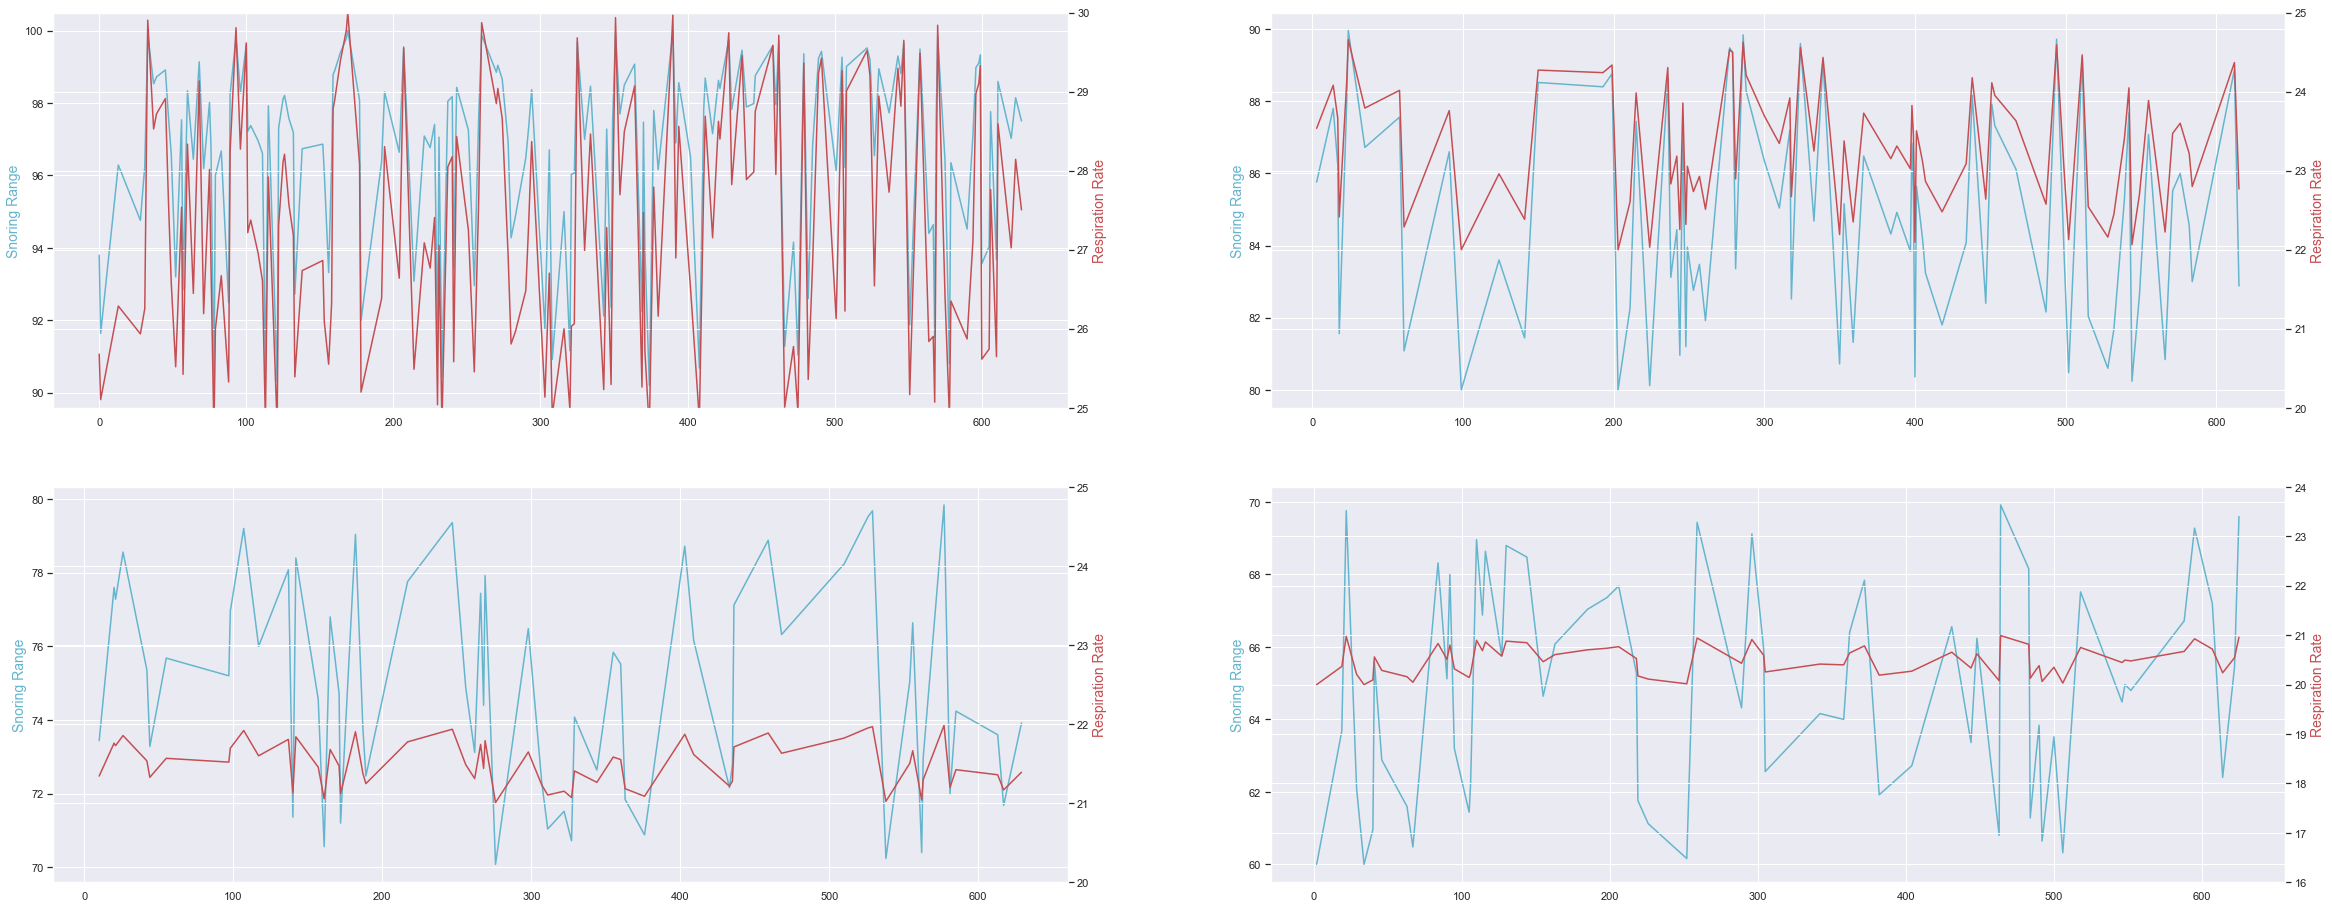

In [50]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, squeeze = False, figsize=(40,16))


ax [0,0].plot (sr_group_90 ['Snoring Range'], color="c")

ax [0,0].set_ylabel("Snoring Range",color="c",fontsize=14)

ax01 = ax [0,0].twinx()

ax01.set_ylim (25,30)

ax01.plot(sr_group_90 ['Respiration Rate'],color="r")

ax01.set_ylabel("Respiration Rate",color="r",fontsize=14)



ax [0,1].plot (sr_group_80 ['Snoring Range'], color="c")

ax [0,1].set_ylabel("Snoring Range",color="c",fontsize=14)

ax02 = ax [0,1].twinx()

ax02.set_ylim (20,25)

ax02.plot(sr_group_80 ['Respiration Rate'],color="r")

ax02.set_ylabel("Respiration Rate",color="r",fontsize=14)



ax [1,0].plot (sr_group_70 ['Snoring Range'], color="c")

ax [1,0].set_ylabel("Snoring Range",color="c",fontsize=14)

ax03 = ax [1,0].twinx()

ax03.set_ylim (20,25)

ax03.plot(sr_group_70 ['Respiration Rate'],color="r")

ax03.set_ylabel("Respiration Rate",color="r",fontsize=14)



ax [1,1].plot (sr_group_60 ['Snoring Range'], color="c")

ax [1,1].set_ylabel("Snoring Range",color="c",fontsize=14)

ax02 = ax [1,1].twinx()

ax02.set_ylim (16,24)

ax02.plot(sr_group_60 ['Respiration Rate'],color="r")

ax02.set_ylabel("Respiration Rate",color="r",fontsize=14)

plt.show()


In [52]:
df_SaYo_3 = df_SaYo.copy() #copying the original dataset 

df_SaYo_3.head()

,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen Levels,Eye Movement,Numbers of Hours of Sleep,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [56]:
df_SaYo_3['Blood Oxygen Levels'] = df_SaYo_3['Blood Oxygen Levels'].astype(float)

bol_group_95 = df_SaYo_3[(df_SaYo_3['Blood Oxygen Levels'] >= 95) & (df_SaYo_3['Blood Oxygen Levels'] <= 100)]

bol_group_90 = df_SaYo_3[(df_SaYo_3['Blood Oxygen Levels'] >= 90) & (df_SaYo_3['Blood Oxygen Levels'] < 95)]

bol_group_85 = df_SaYo_3[(df_SaYo_3['Blood Oxygen Levels'] >= 85) & (df_SaYo_3['Blood Oxygen Levels'] < 90)]

bol_group_80 = df_SaYo_3[(df_SaYo_3['Blood Oxygen Levels'] >= 80) & (df_SaYo_3['Blood Oxygen Levels'] < 85)]

Text(0, 0.5, 'Body Temperature')

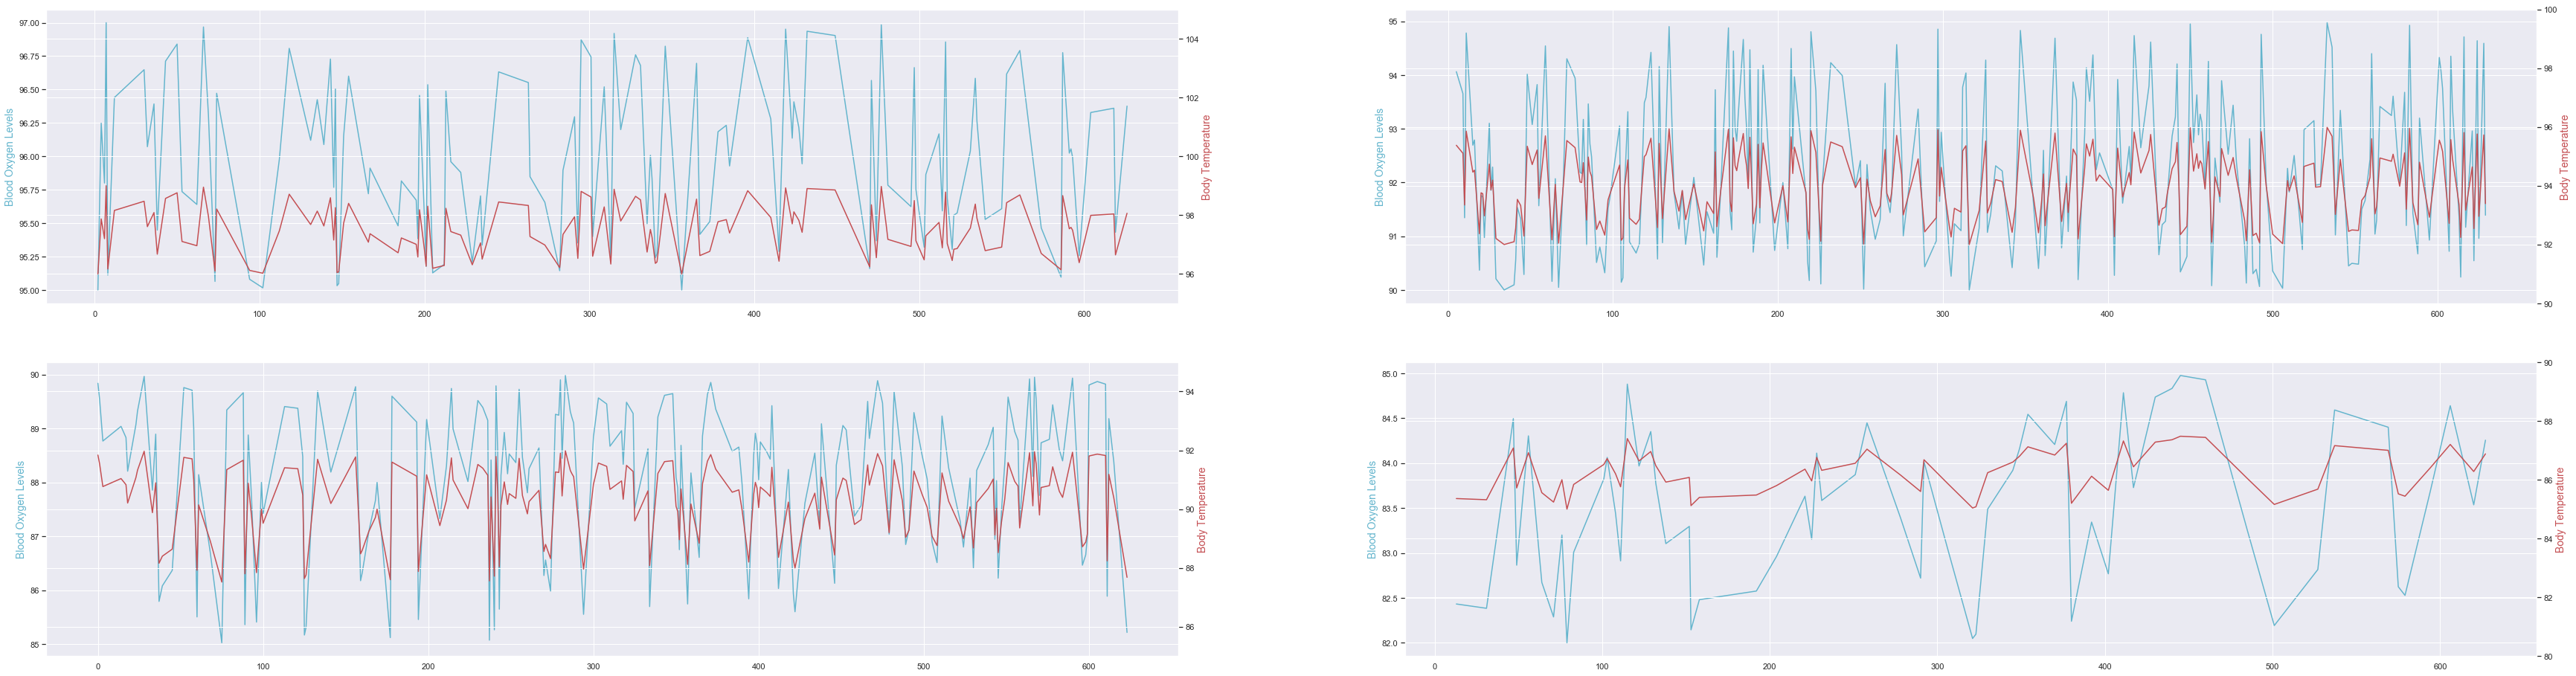

In [65]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, squeeze = False, figsize=(60,16))


ax [0,0].plot (bol_group_95 ['Blood Oxygen Levels'], color="c")

ax [0,0].set_ylabel("Blood Oxygen Levels",color="c",fontsize=14)

ax01 = ax [0,0].twinx()

ax01.set_ylim (95,105)

ax01.plot(bol_group_95 ['Body Temperature'],color="r")

ax01.set_ylabel("Body Temperature",color="r",fontsize=14)



ax [0,1].plot (bol_group_90 ['Blood Oxygen Levels'], color="c")

ax [0,1].set_ylabel("Blood Oxygen Levels",color="c",fontsize=14)

ax02 = ax [0,1].twinx()

ax02.set_ylim (90,100)

ax02.plot(bol_group_90 ['Body Temperature'],color="r")

ax02.set_ylabel("Body Temperature",color="r",fontsize=14)



ax [1,0].plot (bol_group_85 ['Blood Oxygen Levels'], color="c")

ax [1,0].set_ylabel("Blood Oxygen Levels",color="c",fontsize=14)

ax03 = ax [1,0].twinx()

ax03.set_ylim (85,95)

ax03.plot(bol_group_85 ['Body Temperature'],color="r")

ax03.set_ylabel("Body Temperature",color="r",fontsize=14)



ax [1,1].plot (bol_group_80 ['Blood Oxygen Levels'], color="c")

ax [1,1].set_ylabel("Blood Oxygen Levels",color="c",fontsize=14)

ax04 = ax [1,1].twinx()

ax04.set_ylim (80,90)

ax04.plot(bol_group_80 ['Body Temperature'],color="r")

ax04.set_ylabel("Body Temperature",color="r",fontsize=14)
